In [1]:
!pip install ISR

In [2]:
"""
!wget http://data.vision.ee.ethz.ch/cvl/DIV2K/DIV2K_train_LR_bicubic_X2.zip
!wget http://data.vision.ee.ethz.ch/cvl/DIV2K/DIV2K_valid_LR_bicubic_X2.zip
!wget http://data.vision.ee.ethz.ch/cvl/DIV2K/DIV2K_train_HR.zip
!wget http://data.vision.ee.ethz.ch/cvl/DIV2K/DIV2K_valid_HR.zip
"""

'\n!wget http://data.vision.ee.ethz.ch/cvl/DIV2K/DIV2K_train_LR_bicubic_X2.zip\n!wget http://data.vision.ee.ethz.ch/cvl/DIV2K/DIV2K_valid_LR_bicubic_X2.zip\n!wget http://data.vision.ee.ethz.ch/cvl/DIV2K/DIV2K_train_HR.zip\n!wget http://data.vision.ee.ethz.ch/cvl/DIV2K/DIV2K_valid_HR.zip\n'

In [3]:
"""
!mkdir div2k
!unzip -q DIV2K_valid_LR_bicubic_X2.zip -d div2k
!unzip -q DIV2K_train_LR_bicubic_X2.zip -d div2k
!unzip -q DIV2K_train_HR.zip -d div2k
!unzip -q DIV2K_valid_HR.zip -d div2k
"""

'\n!mkdir div2k\n!unzip -q DIV2K_valid_LR_bicubic_X2.zip -d div2k\n!unzip -q DIV2K_train_LR_bicubic_X2.zip -d div2k\n!unzip -q DIV2K_train_HR.zip -d div2k\n!unzip -q DIV2K_valid_HR.zip -d div2k\n'

In [2]:
from ISR.models import RRDN
from ISR.models import Discriminator
from ISR.models import Cut_VGG19


In [5]:
lr_train_patch_size = 50
layers_to_extract = [5, 9]
scale = 2
hr_train_patch_size = lr_train_patch_size * scale

rrdn  = RRDN(arch_params={'C':4, 'D':3, 'G':64, 'G0':64, 'T':10, 'x':scale}, patch_size=lr_train_patch_size)
f_ext = Cut_VGG19(patch_size=hr_train_patch_size, layers_to_extract=layers_to_extract)
discr = Discriminator(patch_size=hr_train_patch_size, kernel_size=3)


In [6]:
from ISR.train import Trainer
loss_weights = {
  'generator': 0.0,
  'feature_extractor': 0.0833,
  'discriminator': 0.01
}
losses = {
  'generator': 'mae',
  'feature_extractor': 'mse',
  'discriminator': 'binary_crossentropy'
} 

log_dirs = {'logs': './logs', 'weights': './weights'}

learning_rate = {'initial_value': 0.0004, 'decay_factor': 0.5, 'decay_frequency': 30}

flatness = {'min': 0.0, 'max': 0.15, 'increase': 0.01, 'increase_frequency': 5}

trainer = Trainer(
    generator=rrdn,
    discriminator=discr,
    feature_extractor=f_ext,
    lr_train_dir='div2k/DIV2K_train_LR_bicubic/X2/',
    hr_train_dir='div2k/DIV2K_train_HR/',
    lr_valid_dir='div2k/DIV2K_train_LR_bicubic/X2/',
    hr_valid_dir='div2k/DIV2K_train_HR/',
    loss_weights=loss_weights,
    learning_rate=learning_rate,
    flatness=flatness,
    dataname='div2k',
    log_dirs=log_dirs,
    weights_generator=None,
    weights_discriminator=None,
    n_validation=50,
)

In [7]:
trainer.train(
    epochs=2,
    steps_per_epoch=20,
    batch_size=4,
    monitored_metrics={'val_generator_PSNR_Y': 'max'}
)



Training details:
  training_parameters: 
    metrics: {'generator': <function PSNR_Y at 0x00000298FA6A92F0>}
    losses: {'generator': 'mae', 'discriminator': 'binary_crossentropy', 'feature_extractor': 'mse'}
    adam_optimizer: {'beta1': 0.9, 'beta2': 0.999, 'epsilon': None}
    learning_rate: {'initial_value': 0.0004, 'decay_factor': 0.5, 'decay_frequency': 30}
    flatness: {'min': 0.0, 'max': 0.15, 'increase': 0.01, 'increase_frequency': 5}
    n_validation: 50
    dataname: div2k
    fallback_save_every_n_epochs: 2
    log_dirs: {'logs': './logs', 'weights': './weights'}
    loss_weights: {'generator': 0.0, 'feature_extractor': 0.0833, 'discriminator': 0.01}
    hr_valid_dir: div2k/DIV2K_train_HR/
    lr_valid_dir: div2k/DIV2K_train_LR_bicubic/X2/
    hr_train_dir: div2k/DIV2K_train_HR/
    lr_train_dir: div2k/DIV2K_train_LR_bicubic/X2/
    lr_patch_size: 50
    steps_per_epoch: 20
    batch_size: 4
    starting_epoch: 0
  generator: 
    name: rrdn
    parameters: {'C': 4, 'D'

Epoch 0/2
Current learning rate: 0.00039999998989515007
100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [05:38<00:00, 16.93s/it]
Epoch 0 took      338.6s


200/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

{'val_loss': 0.7859038174152374, 'val_generator_loss': 0.46389565, 'val_discriminator_loss': 0.05654492, 'val_feature_extractor_loss': 3.6357229, 'val_feature_extractor_1_loss': 15.219937, 'val_generator_PSNR_Y': 7.2964263, 'train_d_real_loss': 0.022558516, 'train_d_real_accuracy': 1.0, 'train_d_fake_loss': 0.09050275, 'train_d_fake_accuracy': 0.994, 'train_loss': 0.7459526, 'train_generator_loss': 0.235383, 'train_discriminator_loss': 0.005779965, 'train_feature_extractor_loss': 3.8866372, 'train_feature_extractor_1_loss': 14.022001, 'train_generator_PSNR_Y': 11.889807}
val_generator_PSNR_Y improved from       -inf to    7.29643
Saving weights
Epoch 1/2
Current learning rate: 0.00039999998989515007
100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [05:42<00:00, 17.14s/it]
Epoch 1 took      342.9s


200/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

{'val_loss': 0.4763940787315369, 'val_generator_loss': 0.39606568, 'val_discriminator_loss': 1.0413649, 'val_feature_extractor_loss': 2.5237243, 'val_feature_extractor_1_loss': 8.66428, 'val_generator_PSNR_Y': 8.419485, 'train_d_real_loss': 0.7648787, 'train_d_real_accuracy': 0.5832, 'train_d_fake_loss': 1.3185043, 'train_d_fake_accuracy': 0.1136, 'train_loss': 0.17651056, 'train_generator_loss': 0.34672967, 'train_discriminator_loss': 0.69036907, 'train_feature_extractor_loss': 0.83416134, 'train_feature_extractor_1_loss': 3.238032, 'train_generator_PSNR_Y': 8.256593}
val_generator_PSNR_Y improved from    7.29643 to    8.41949
Saving weights


In [8]:
import numpy as np
from PIL import Image
#import matplotlib.pyplot as plt
from ISR.models import RRDN
def predict(img):
        lr_img = np.array(img)
        model = RRDN(weights='gans')
        sr_img = model.predict(np.array(lr_img))
        return (Image.fromarray(sr_img))


In [9]:
import streamlit as st 
from PIL import Image
import numpy as np
from ISR.models import RRDN

def predict(img):
        lr_img = np.array(img)
        model = RRDN(weights='gans')
        sr_img = model.predict(np.array(lr_img))
        return (Image.fromarray(sr_img))


In [14]:
image = Image.open("div2k/test/sandal.jpg")

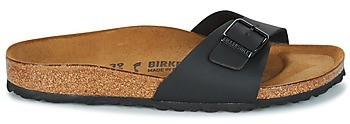

In [15]:
image

In [16]:
pred  = predict(image)

AttributeError: 'str' object has no attribute 'decode'

In [ ]:
pred